# Machine learning
### Anomaly Detection
### Dawid Lisek

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from sklearn.metrics import f1_score
 
data = loadmat('ex8data1.mat')

# TODO: amount of data  
X = data['X']
X.shape   

(307, 2)

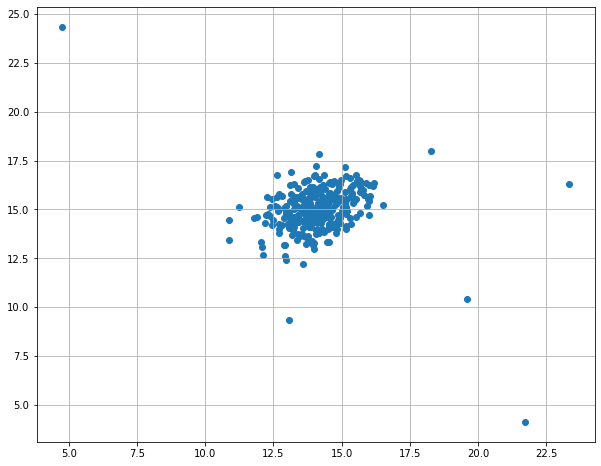

In [60]:
# TODO: visualise the dataset and look for anomalies
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.show()

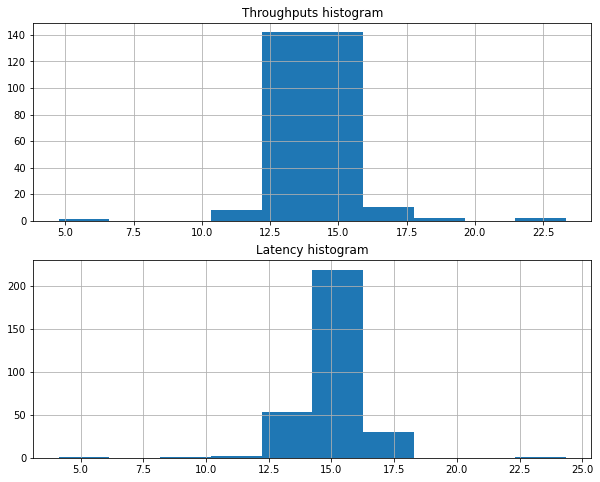

In [61]:
throughput = X[:, 0]
latency = X[:, 1] 
# TODO: plot the histogram for features: throughput (mb/s) and latency (ms).
fig, ax = plt.subplots(2, figsize = (10, 8))
ax[0].hist(throughput)
ax[0].set_title('Throughputs histogram')
ax[1].hist(latency)
ax[1].set_title('Latency histogram')
ax[0].grid()
ax[1].grid()
plt.show()

In [62]:
def estimate_gaussian(X):  
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    return mu, sigma
 
# TODO: run the function for your dataset
mu, sigma = estimate_gaussian(X)
print(f'mu = {mu}\nsigma = {sigma}')

mu = [14.11222578 14.99771051]
sigma = [1.35374717 1.3075723 ]


In [63]:
Xval = data['Xval']  
yval = data['yval']

Xval.shape

(307, 2)

In [64]:
yval.shape

(307, 1)

In [65]:
from scipy import stats
p = stats.norm.pdf(X, loc=mu, scale=sigma)
pval = stats.norm.pdf(Xval, loc=mu, scale=sigma)

In [66]:
def select_threshold(pval, yval): 
    pval_min = pval.min()
    pval_max = pval.max()
    pval_result = np.zeros(yval.shape)
    thresholds = np.linspace(pval_min, pval_max, 10000)
    f1_scores = []
    for threshold in thresholds:
        for i in range(pval.shape[0]):
            if pval[i, 0] < threshold or pval[i, 1] < threshold:
                pval_result[i, 0] = 1
            else:
                pval_result[i, 0] = 0
        f1_scores.append(f1_score(yval, pval_result))
    best_f1 = max(f1_scores)
    best_epsilon = thresholds[np.argmax(f1_scores)]    
    return best_epsilon, best_f1

In [67]:
epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

(0.0003966715195093453, 0.8750000000000001)

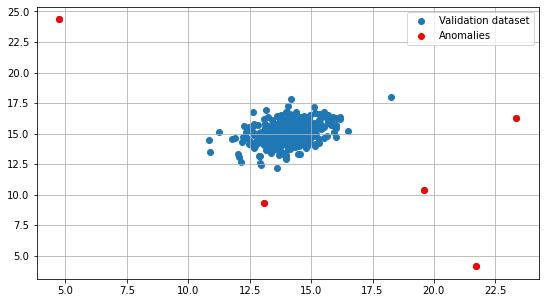

In [108]:
indices = np.where((p[:, 0] < epsilon) | (p[:, 1] < epsilon))
anomalies = [X[i] for i in indices][0]
plt.figure(figsize=(9,5))
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color="r")
plt.grid()
plt.legend(["Validation dataset", "Anomalies"])
plt.show()